In [58]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sklearn as sk
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.preprocessing import PowerTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.utils import resample

from scipy.stats import skew

In [3]:
# import numpy as np
# print(np.__version__)


1.23.1


# Exploratory Data Analysis (EDA)

## description of the features

| Feature                | Description                                                                                                          |
|------------------------|----------------------------------------------------------------------------------------------------------------------|
| ID                     | Patient ID                                                                                                           |
| Status                 | 0 = no diabetes, 1 = prediabetes or diabetes                                                                         |
| HighBP                 | 0 = no high BP, 1 = high BP                                                                                          |
| HighChol               | 0 = no high cholesterol, 1 = high cholesterol                                                                        |
| CholCheck              | 0 = no cholesterol check in 5 years, 1 = yes cholesterol check in 5 years                                            |
| BMI                    | Body Mass Index                                                                                                      |
| Smoker                 | 0 = no, 1 = yes (Have smoked at least 100 cigarettes in their entire life)                                           |
| Stroke                 | 0 = no, 1 = yes (Ever told they had a stroke)                                                                        |
| HeartDiseaseorAttack   | 0 = no, 1 = yes (coronary heart disease (CHD) or myocardial infarction (MI))                                         |
| PhysActivity           | 0 = no, 1 = yes (Physical activity in the past 30 days, not including job)                                           |
| Fruits                 | 0 = no, 1 = yes (Consume fruit 1 or more times per day)                                                              |
| Veggies                | 0 = no, 1 = yes (Consume vegetables 1 or more times per day)                                                         |
| HvyAlcoholConsump      | 0 = no, 1 = yes (Heavy drinkers: men >14 drinks/week, women >7 drinks/week)                                          |
| AnyHealthcare          | 0 = no, 1 = yes (Have any kind of health care coverage)                                                              |
| NoDocbcCost            | 0 = no, 1 = yes (Was there a time in the past 12 months when you needed to see a doctor but could not because of cost)|
| GenHlth                | Scale 1-5 (1 = excellent, 5 = poor)                                                                                  |
| MentHlth               | Scale 1-30 days (Days mental health was not good in the past 30 days)                                                |
| PhysHlth               | Scale 1-30 days (Days physical health was not good in the past 30 days)                                              |
| DiffWalk               | 0 = no, 1 = yes (Do you have serious difficulty walking or climbing stairs?)                                         |
| Sex                    | 0 = female, 1 = male                                                                                                  |
| Age                    | 13-level age category (1 = 18-24, 9 = 60-64, 13 = 80 or older)                                                        |
| Education              | Scale 1-6 (1 = Never attended school or only kindergarten, 6 = College 4 years or more)                              |
| Income                 | Scale 1-8 (1 = less than $10,000, 5 = less than $35,000, 8 = $75,000 or more)                                        |
| ExtraMedTest           | The result of an extra medical test, range (-100, 100)                                                               |
| ExtraAlcoholTest       | The result of an extra alcohol test, range (-100, 100)                                                               |

In [4]:
df_train = pd.read_csv('data_train.csv')

In [5]:
df_train.head()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
0,0,0,0,1,24,1,0,0,1,0,...,0,0,0,0,8,4,5,60,0,0
1,1,0,0,1,28,0,0,0,1,1,...,1,0,0,0,2,6,8,0,-64,0
2,2,0,0,1,36,1,0,0,1,1,...,30,30,1,0,3,2,1,-46,0,0
3,3,0,1,1,35,0,0,0,1,1,...,0,0,0,0,8,6,8,-83,-188,0
4,4,0,1,1,27,0,0,0,1,0,...,0,0,0,0,9,5,4,-58,0,0


In [6]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 25 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   Id                    202944 non-null  int64
 1   HighBP                202944 non-null  int64
 2   HighChol              202944 non-null  int64
 3   CholCheck             202944 non-null  int64
 4   BMI                   202944 non-null  int64
 5   Smoker                202944 non-null  int64
 6   Stroke                202944 non-null  int64
 7   HeartDiseaseorAttack  202944 non-null  int64
 8   PhysActivity          202944 non-null  int64
 9   Fruits                202944 non-null  int64
 10  Veggies               202944 non-null  int64
 11  HvyAlcoholConsump     202944 non-null  int64
 12  AnyHealthcare         202944 non-null  int64
 13  NoDocbcCost           202944 non-null  int64
 14  GenHlth               202944 non-null  int64
 15  MentHlth              202944 non-n

In [7]:
# check if the datasets have null values
pd.isna(df_train).sum()

Id                      0
HighBP                  0
HighChol                0
CholCheck               0
BMI                     0
Smoker                  0
Stroke                  0
HeartDiseaseorAttack    0
PhysActivity            0
Fruits                  0
Veggies                 0
HvyAlcoholConsump       0
AnyHealthcare           0
NoDocbcCost             0
GenHlth                 0
MentHlth                0
PhysHlth                0
DiffWalk                0
Sex                     0
Age                     0
Education               0
Income                  0
ExtraMedTest            0
ExtraAlcoholTest        0
Status                  0
dtype: int64

In [8]:
df_train.describe()

,Id,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest,Status
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,101471.500000,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,...,3.196971,4.256455,0.168707,0.439545,8.037449,5.050245,6.055641,-7.408660,-7.560041,0.175571
std,58585.030853,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,...,7.427247,8.736665,0.374494,0.496333,3.051568,0.985601,2.070140,75.993743,75.927137,0.380455
min,0.000000,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000,0.000000
25%,50735.750000,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000,0.000000
50%,101471.500000,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000,0.000000
75%,152207.250000,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,...,2.000000,3.000000,0.000000,1.000000,10.000000,6.000000,8.000000,40.000000,40.000000,0.000000
max,202943.000000,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000,1.000000


**Note** : At first, *'Id'*, and *'Sex'* does not contribute to the prediction for diabetes, hence I will drop these 2 columns.

In [88]:
# drop 'Id', 'Sex' and 'Status' column
df_train_complete = df_train.copy()
if 'Id' in df_train.columns:
    df_train_complete.drop('Id', axis=1, inplace=True)

if 'Sex' in df_train.columns:
    df_train_complete.drop('Sex', axis=1, inplace=True)

# if 'Status' in df_train.columns:
#     df_train_complete.drop('Status', axis=1, inplace=True)

In [89]:
df_train_complete.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202944 entries, 0 to 202943
Data columns (total 23 columns):
 #   Column                Non-Null Count   Dtype
---  ------                --------------   -----
 0   HighBP                202944 non-null  int64
 1   HighChol              202944 non-null  int64
 2   CholCheck             202944 non-null  int64
 3   BMI                   202944 non-null  int64
 4   Smoker                202944 non-null  int64
 5   Stroke                202944 non-null  int64
 6   HeartDiseaseorAttack  202944 non-null  int64
 7   PhysActivity          202944 non-null  int64
 8   Fruits                202944 non-null  int64
 9   Veggies               202944 non-null  int64
 10  HvyAlcoholConsump     202944 non-null  int64
 11  AnyHealthcare         202944 non-null  int64
 12  NoDocbcCost           202944 non-null  int64
 13  GenHlth               202944 non-null  int64
 14  MentHlth              202944 non-null  int64
 15  PhysHlth              202944 non-n

# Data Distribution

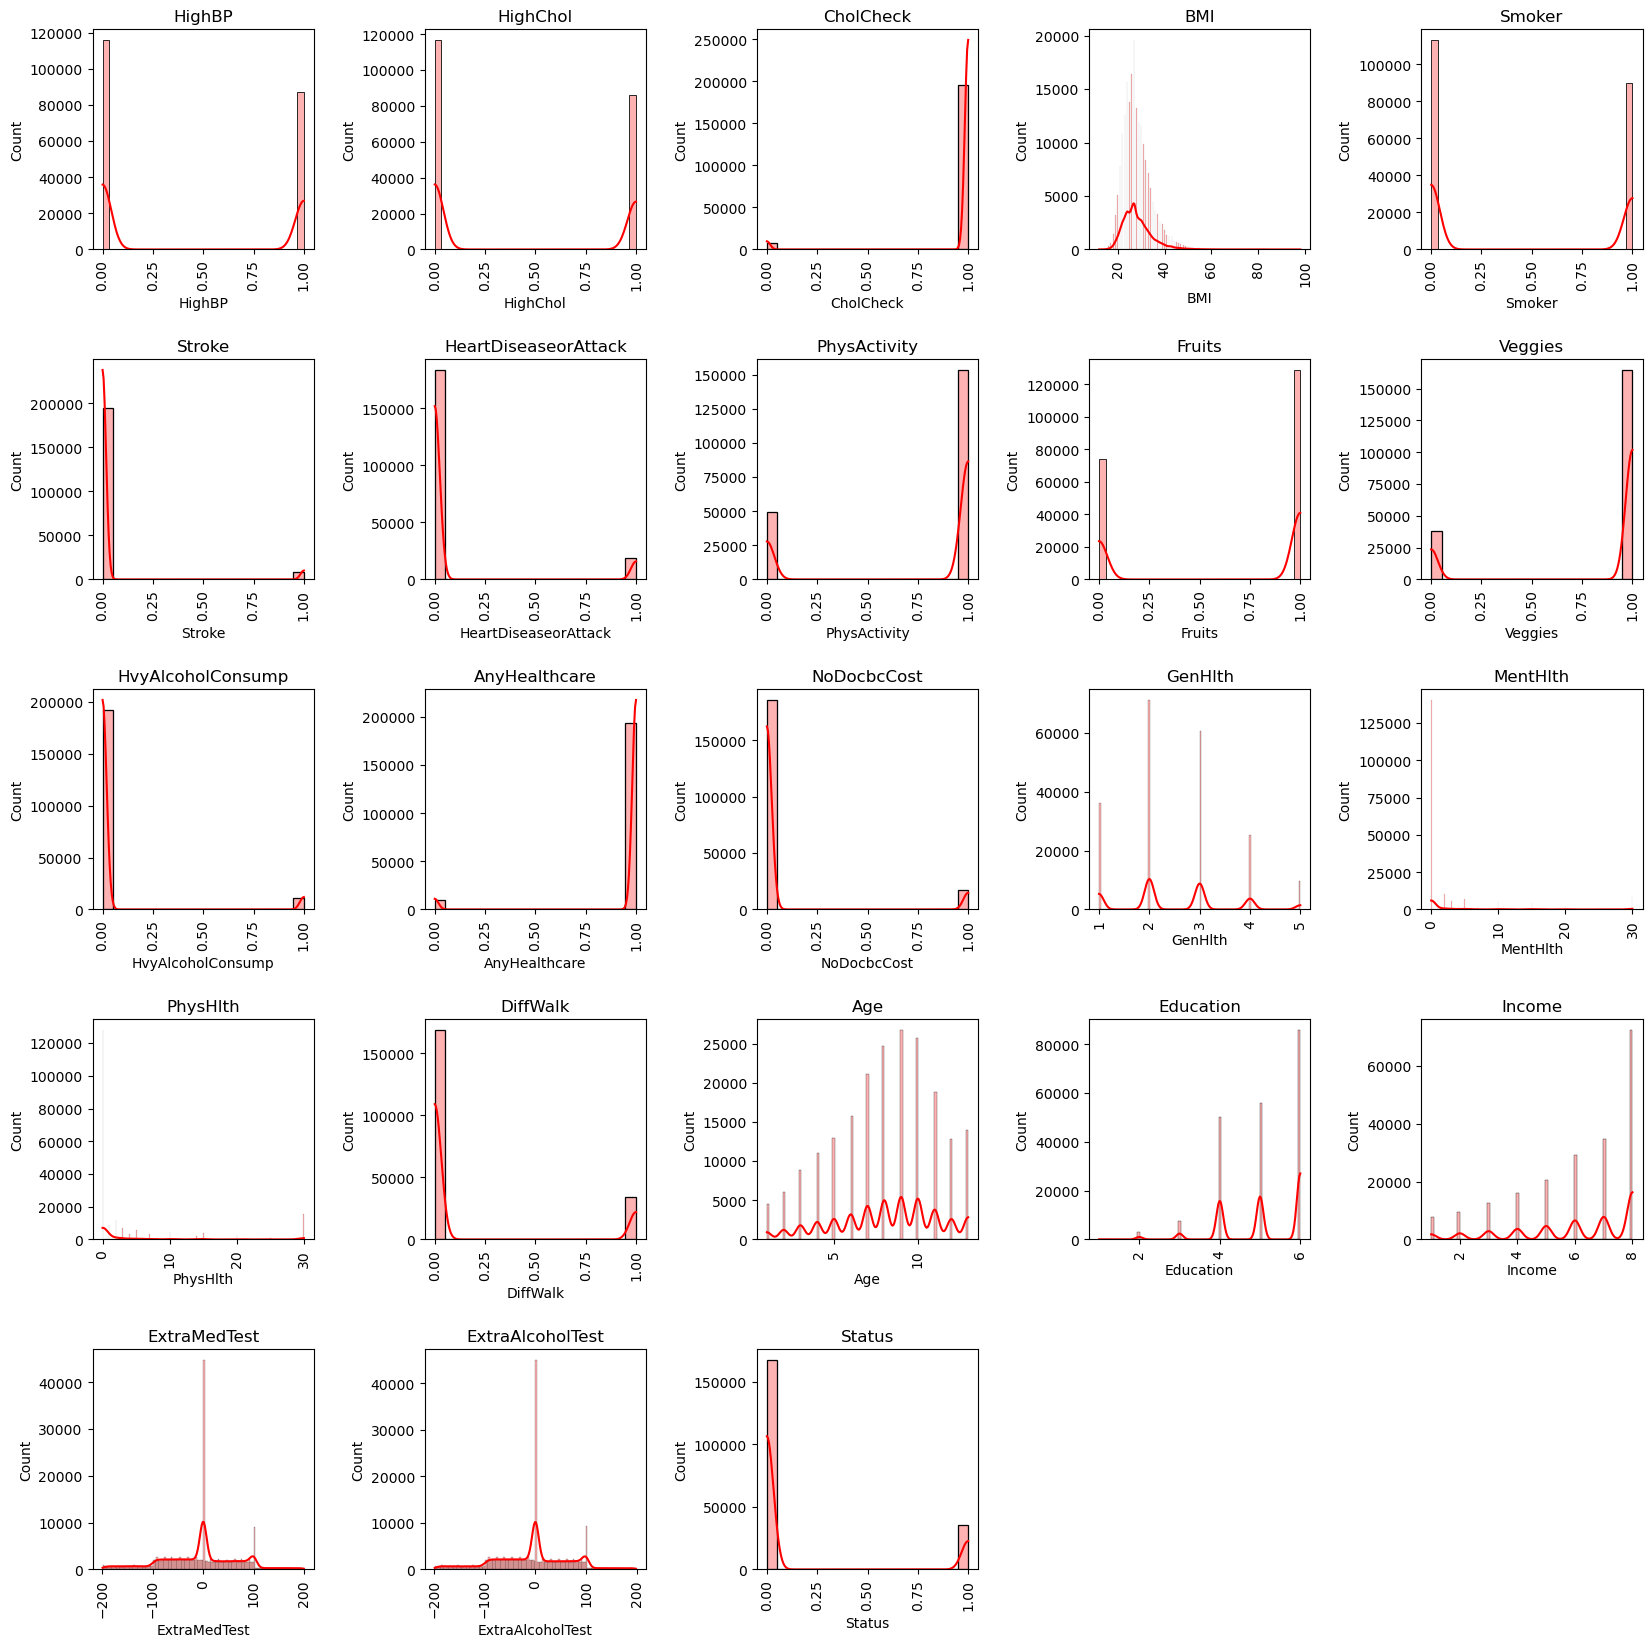

In [48]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the size of the entire figure
plt.figure(figsize=(20, 20))

for i, col in enumerate(df_train_complete.columns):
    plt.subplot(5, 5, i + 1)
    sns.histplot(df_train[col], kde=True, color='r', alpha=0.3)
    plt.title(col)
    plt.xticks(rotation='vertical')

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.5, hspace=0.5)

# Show the plot
plt.show()

The above picture is difficult to see due to the **large** amount of datasets. Hence, another plot is supplied to get a clear picture of data distribution.

In [11]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# import math

# numeric_columns = df_train_complete.select_dtypes(include='number').columns
# num_plots = len(numeric_columns)

# num_cols = 2
# num_rows = math.ceil(num_plots / num_cols)

# plt.figure(figsize=(15, 5*num_rows))

# for i, c in enumerate(numeric_columns):
#     plt.subplot(num_rows, num_cols, i+1)
#     sns.histplot(df_train_complete[c], kde=True, stat='density', alpha=0.7)
#     plt.title(c)
#     plt.xlabel('')

# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=1.0)
# plt.show()

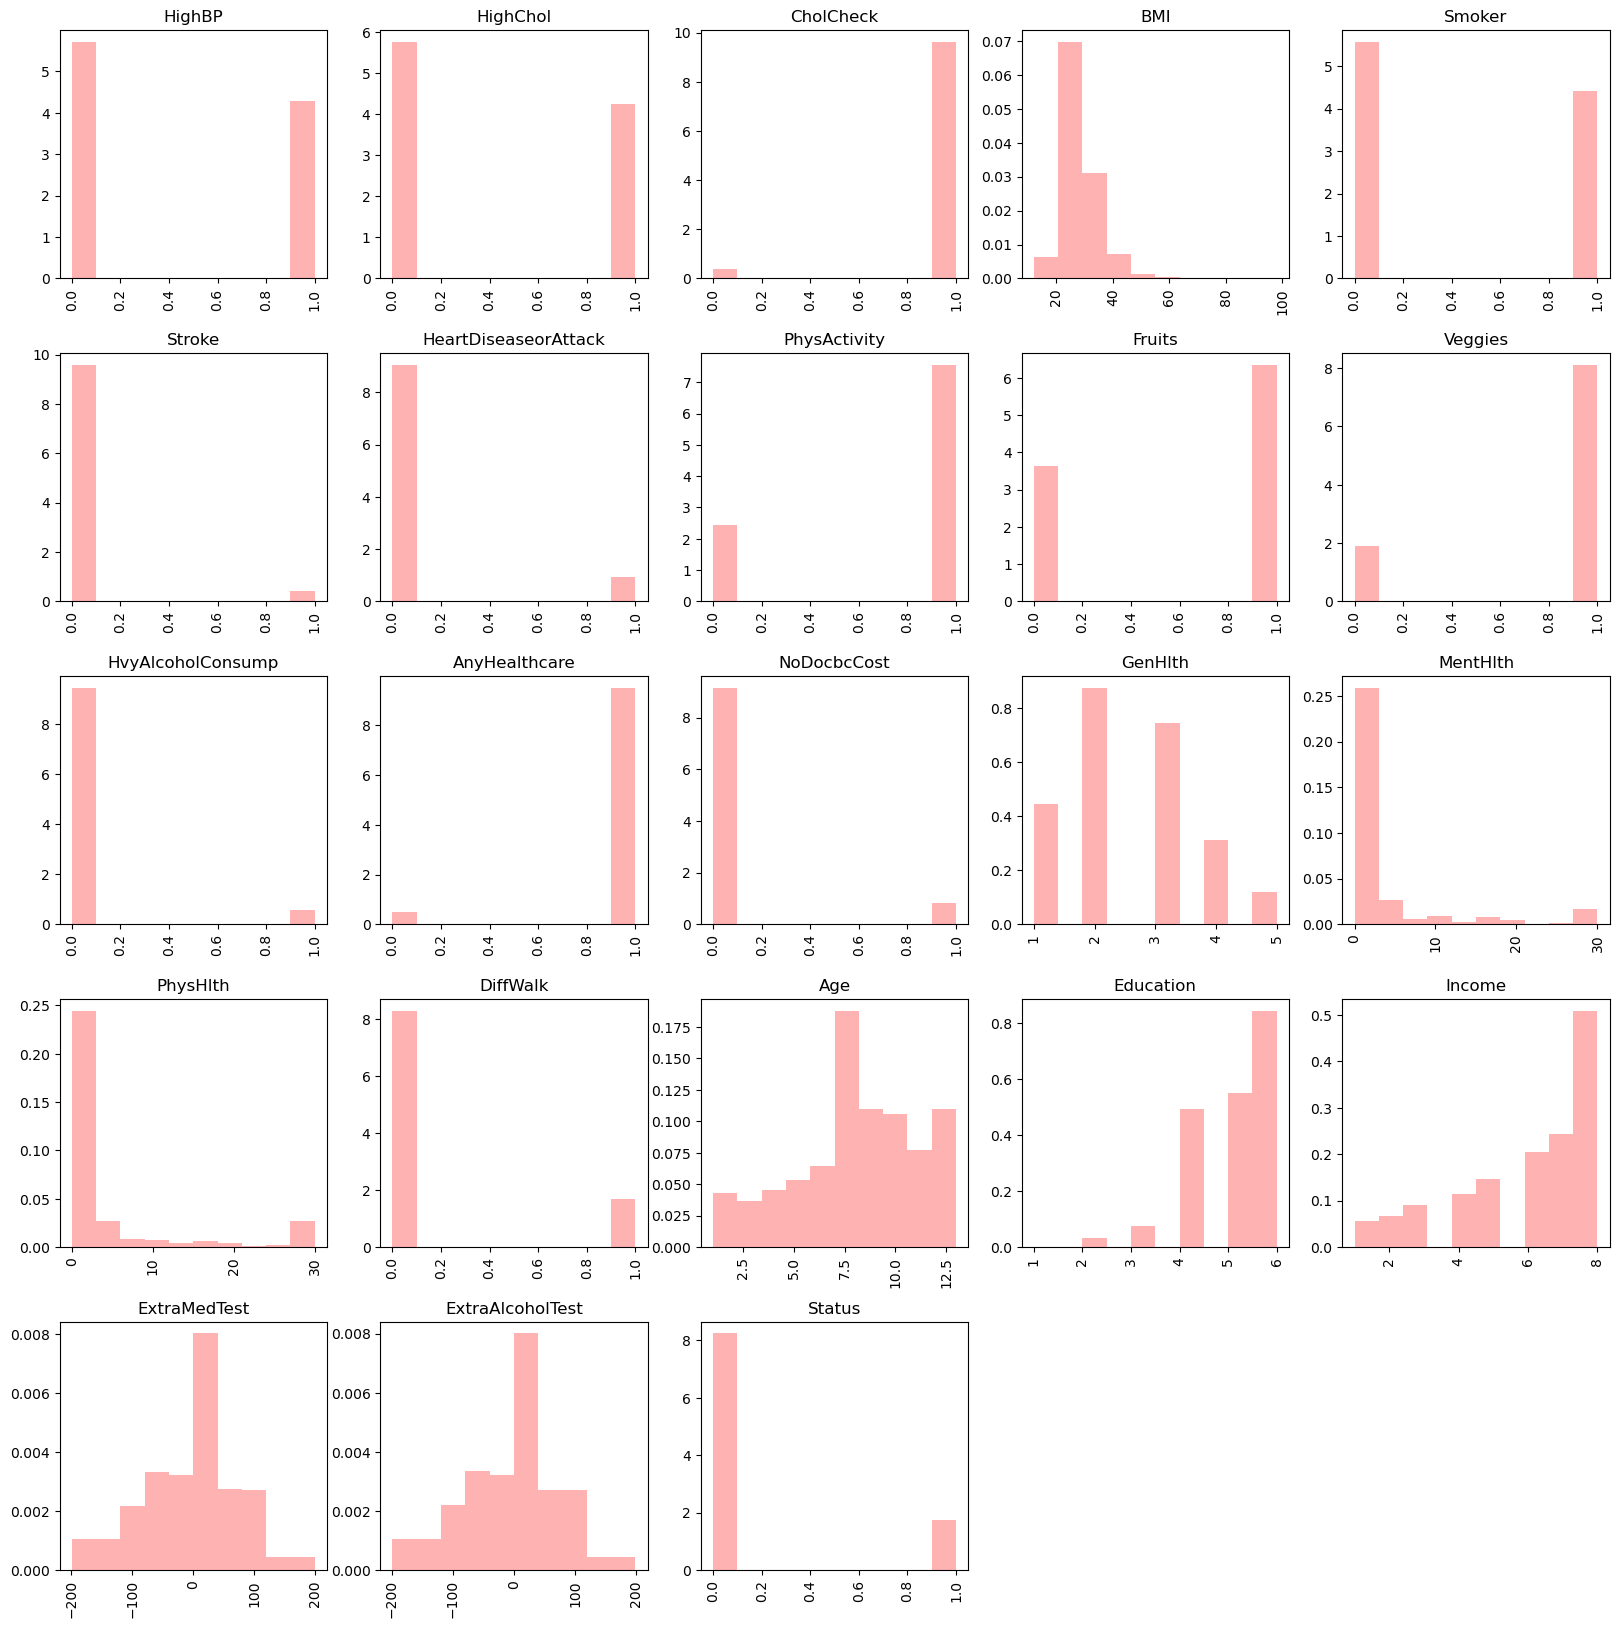

In [49]:
plt.figure(figsize=(20,20))
for i, col in enumerate(df_train_complete.columns):
    plt.subplot(5,5,i + 1)
    plt.hist(df_train[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    
plt.subplots_adjust(wspace=0.2, hspace=0.3)

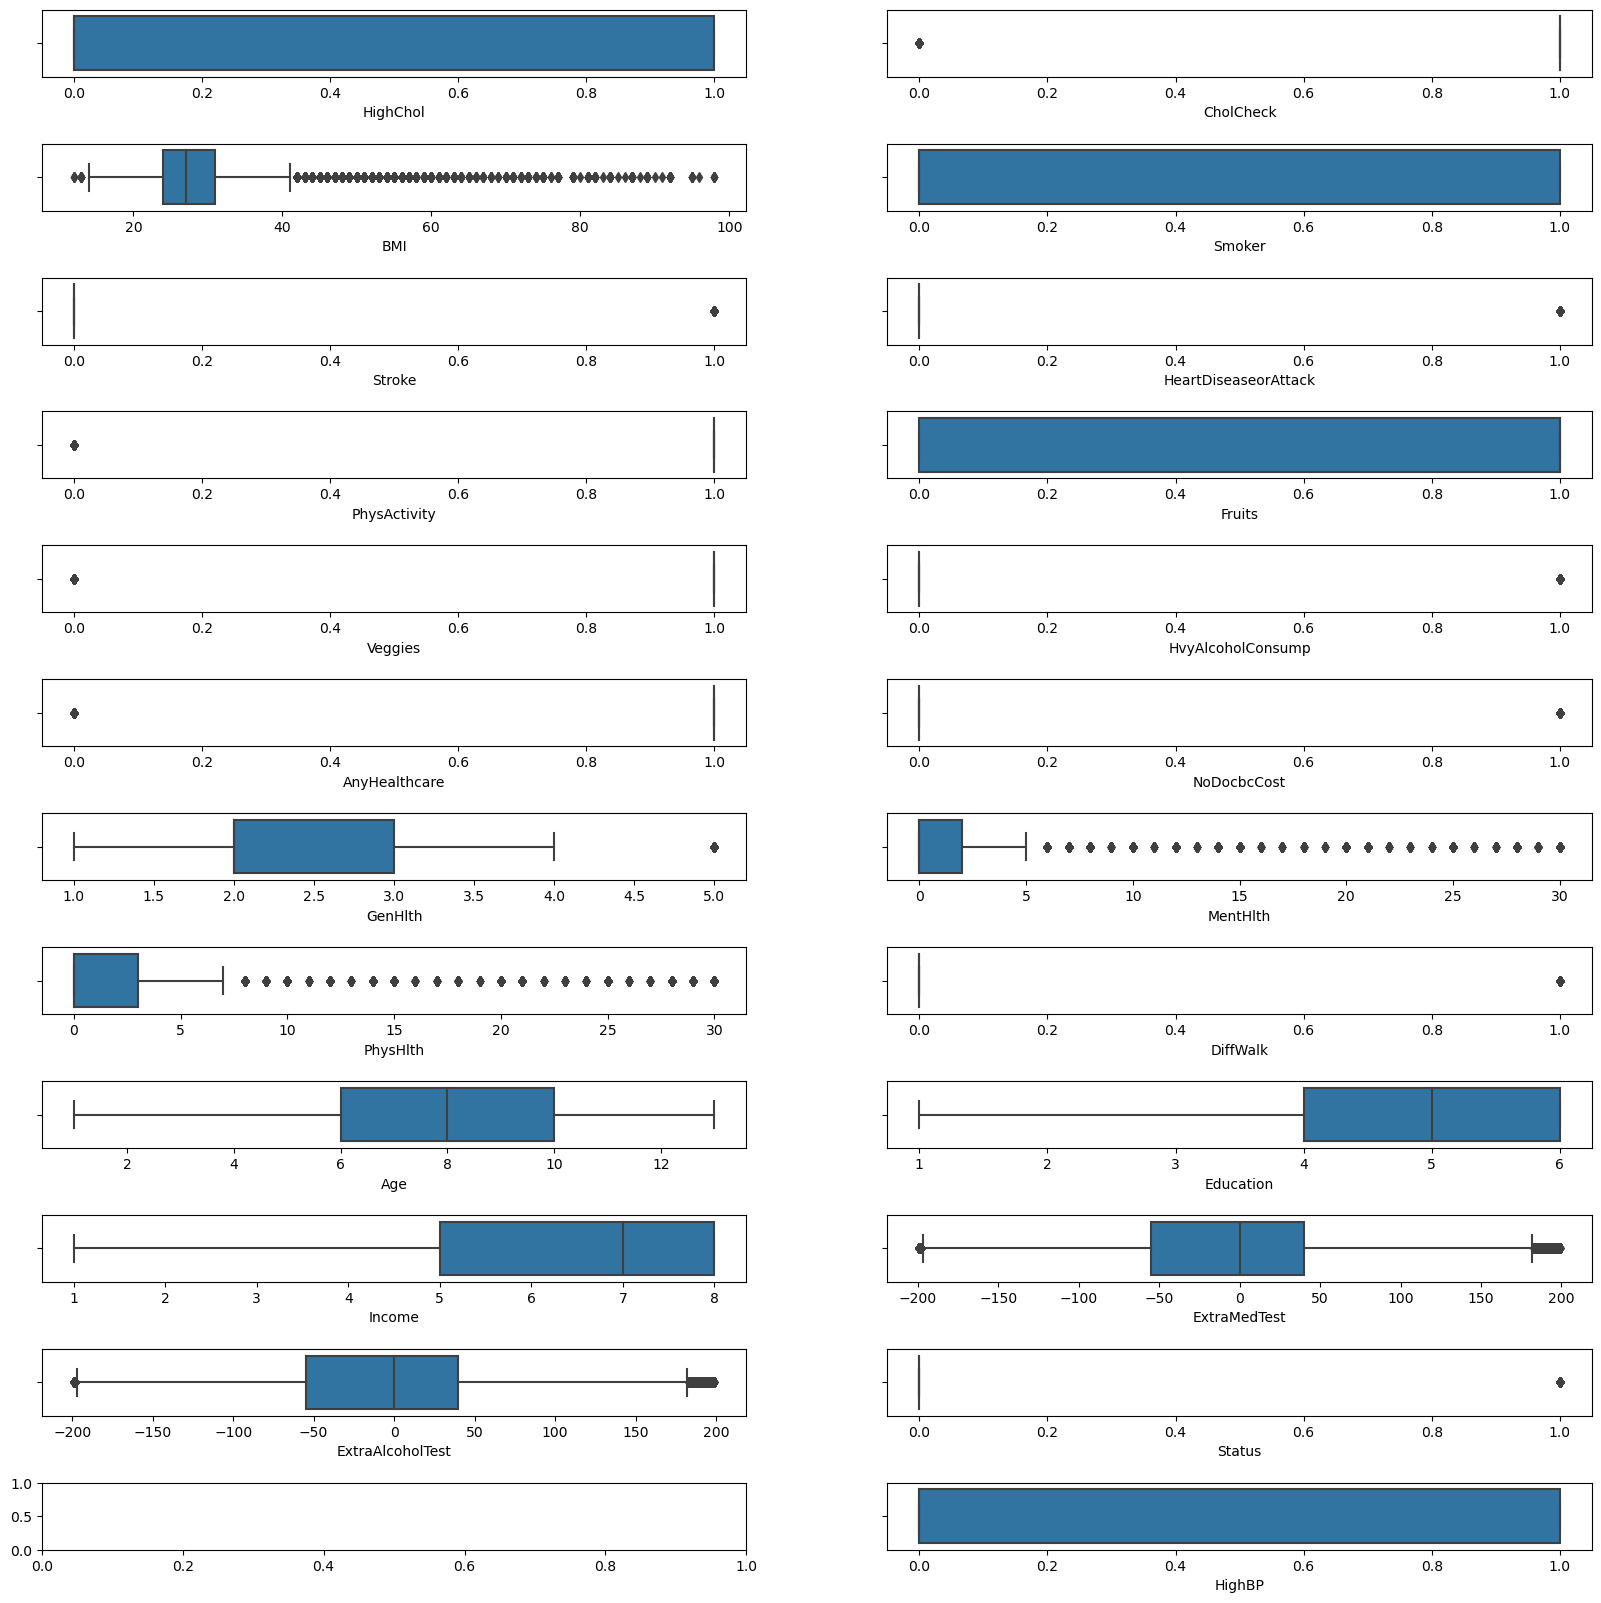

In [50]:
# plot boxplot to examine outliers
fig, ax = plt.subplots(12, 2, figsize=(20,20))
ax = ax.flatten()
for i, v in enumerate(df_train_complete.columns.values):
    sns.boxplot(x = df_train_complete[v], ax=ax[i - 1])

# Adjust the spacing between the subplots
plt.subplots_adjust(wspace=0.2, hspace=1)
plt.show()

To filter which columns to apply transformation to handle outliers and skewed columns, I will calculate the skewness for each column. The threshold is initially determined at **-0.75 - 0.75**.

In [90]:
# Calculate skewness for each column
skewness = df_train_complete.apply(lambda x: skew(x.dropna()))  # Drop NA values for skew calculation
skewed_cols = []
# Filter columns with skewness above a threshold (e.g., 0.75)
for col, skew_val in skewness.iteritems():
    if col == 'Status':
        continue
    # print(col, skew_val)
    if df_train_complete[col].nunique() == 2: # skip binary features
        continue
    elif abs(skew_val) > 0.75:
        skewed_cols.append(col)
print("Skewness for each feature")
print(skewness)
print("---------------")
print("Skewed columns")
print(skewed_cols)

Skewness for each feature
HighBP                  0.288147
HighChol                0.306150
CholCheck              -4.880158
BMI                     2.129208
Smoker                  0.230988
Stroke                  4.639624
HeartDiseaseorAttack    2.774618
PhysActivity           -1.194013
Fruits                 -0.562498
Veggies                -1.593061
HvyAlcoholConsump       3.865809
AnyHealthcare          -4.205698
NoDocbcCost             3.006620
GenHlth                 0.422090
MentHlth                2.715102
PhysHlth                2.201054
DiffWalk                1.769292
Age                    -0.360331
Education              -0.775346
Income                 -0.893194
ExtraMedTest           -0.145711
ExtraAlcoholTest       -0.141507
Status                  1.705484
dtype: float64
---------------
Skewed columns
['BMI', 'MentHlth', 'PhysHlth', 'Education', 'Income']


In [71]:
# Initialize the PowerTransformer with the Yeo-Johnson method
power_transformer = PowerTransformer(method='yeo-johnson', standardize=True)
df_train_transformed = df_train_complete.copy()

# Loop through skewed features and apply the Yeo-Johnson transformation
for feature in skewed_cols:
    # print(feature)
    df_train_transformed[feature] = power_transformer.fit_transform(df_train_transformed[[feature]])

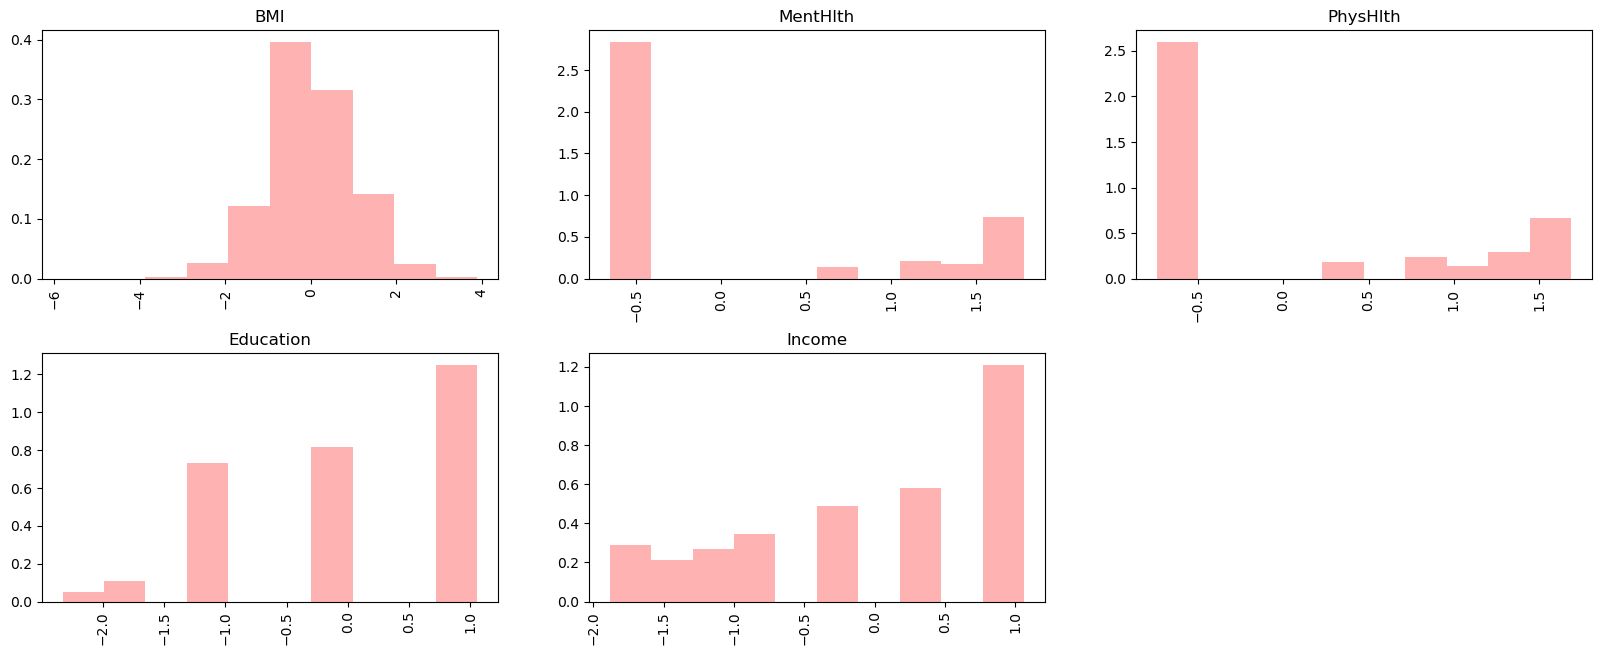

In [72]:
plt.figure(figsize=(20,20))
for i, col in enumerate(skewed_cols):
    plt.subplot(5,3,i + 1)
    plt.hist(df_train_transformed[col], alpha=0.3, color='r', density=True)
    plt.title(col)
    plt.xticks(rotation='vertical')
    
plt.subplots_adjust(wspace=0.2, hspace=0.3)

In [36]:
# df_train_complete.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,28.379824,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,...,0.083693,2.514024,3.196971,4.256455,0.168707,8.037449,5.050245,6.055641,-7.408660,-7.560041
std,0.494891,0.494244,0.189607,6.612738,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,...,0.276928,1.070370,7.427247,8.736665,0.374494,3.051568,0.985601,2.070140,75.993743,75.927137
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,-199.000000,-199.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,6.000000,4.000000,5.000000,-55.000000,-55.000000
50%,0.000000,0.000000,1.000000,27.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,0.000000,0.000000,0.000000,8.000000,5.000000,7.000000,0.000000,0.000000
75%,1.000000,1.000000,1.000000,31.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,2.000000,3.000000,0.000000,10.000000,6.000000,8.000000,40.000000,40.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,30.000000,30.000000,1.000000,13.000000,6.000000,8.000000,199.000000,199.000000


In [37]:
# df_train_transformed.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Age,Education,Income,ExtraMedTest,ExtraAlcoholTest
count,202944.000000,202944.000000,202944.000000,2.029440e+05,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,202944.000000,...,202944.000000,202944.000000,2.029440e+05,2.029440e+05,202944.000000,202944.000000,2.029440e+05,2.029440e+05,202944.000000,202944.000000
mean,0.428700,0.424344,0.962655,4.431017e-15,0.442634,0.040844,0.094391,0.756302,0.635372,0.811519,...,0.083693,2.514024,1.934291e-15,-1.037830e-15,0.168707,8.037449,2.222728e-15,-7.912243e-16,-7.408660,-7.560041
std,0.494891,0.494244,0.189607,1.000002e+00,0.496700,0.197929,0.292372,0.429313,0.481327,0.391096,...,0.276928,1.070370,1.000002e+00,1.000002e+00,0.374494,3.051568,1.000002e+00,1.000002e+00,75.993743,75.927137
min,0.000000,0.000000,0.000000,-5.805139e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,1.000000,-6.574412e-01,-7.413203e-01,0.000000,1.000000,-2.329680e+00,-1.884742e+00,-199.000000,-199.000000
25%,0.000000,0.000000,1.000000,-6.673821e-01,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,...,0.000000,2.000000,-6.574412e-01,-7.413203e-01,0.000000,6.000000,-1.143018e+00,-7.272050e-01,-55.000000,-55.000000
50%,0.000000,0.000000,1.000000,-4.527463e-02,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,2.000000,-6.574412e-01,-7.413203e-01,0.000000,8.000000,-2.244443e-01,3.727293e-01,0.000000,0.000000
75%,1.000000,1.000000,1.000000,6.109059e-01,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,3.000000,1.194154e+00,1.096158e+00,0.000000,10.000000,1.054791e+00,1.061302e+00,40.000000,40.000000
max,1.000000,1.000000,1.000000,3.892754e+00,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,5.000000,1.782110e+00,1.687078e+00,1.000000,13.000000,1.054791e+00,1.061302e+00,199.000000,199.000000


In [73]:
# Calculate skewness for each column
skewness_transformed = df_train_transformed.apply(lambda x: skew(x.dropna()))  # Drop NA values for skew calculation
print("Skewness for each feature")
print(skewness_transformed)

Skewness for each feature
HighBP                  0.288147
HighChol                0.306150
CholCheck              -4.880158
BMI                    -0.025545
Smoker                  0.230988
Stroke                  4.639624
HeartDiseaseorAttack    2.774618
PhysActivity           -1.194013
Fruits                 -0.562498
Veggies                -1.593061
HvyAlcoholConsump       3.865809
AnyHealthcare          -4.205698
NoDocbcCost             3.006620
GenHlth                 0.422090
MentHlth                0.918436
PhysHlth                0.708622
DiffWalk                1.769292
Age                    -0.360331
Education              -0.243843
Income                 -0.418657
ExtraMedTest           -0.145711
ExtraAlcoholTest       -0.141507
Status                  1.705484
dtype: float64


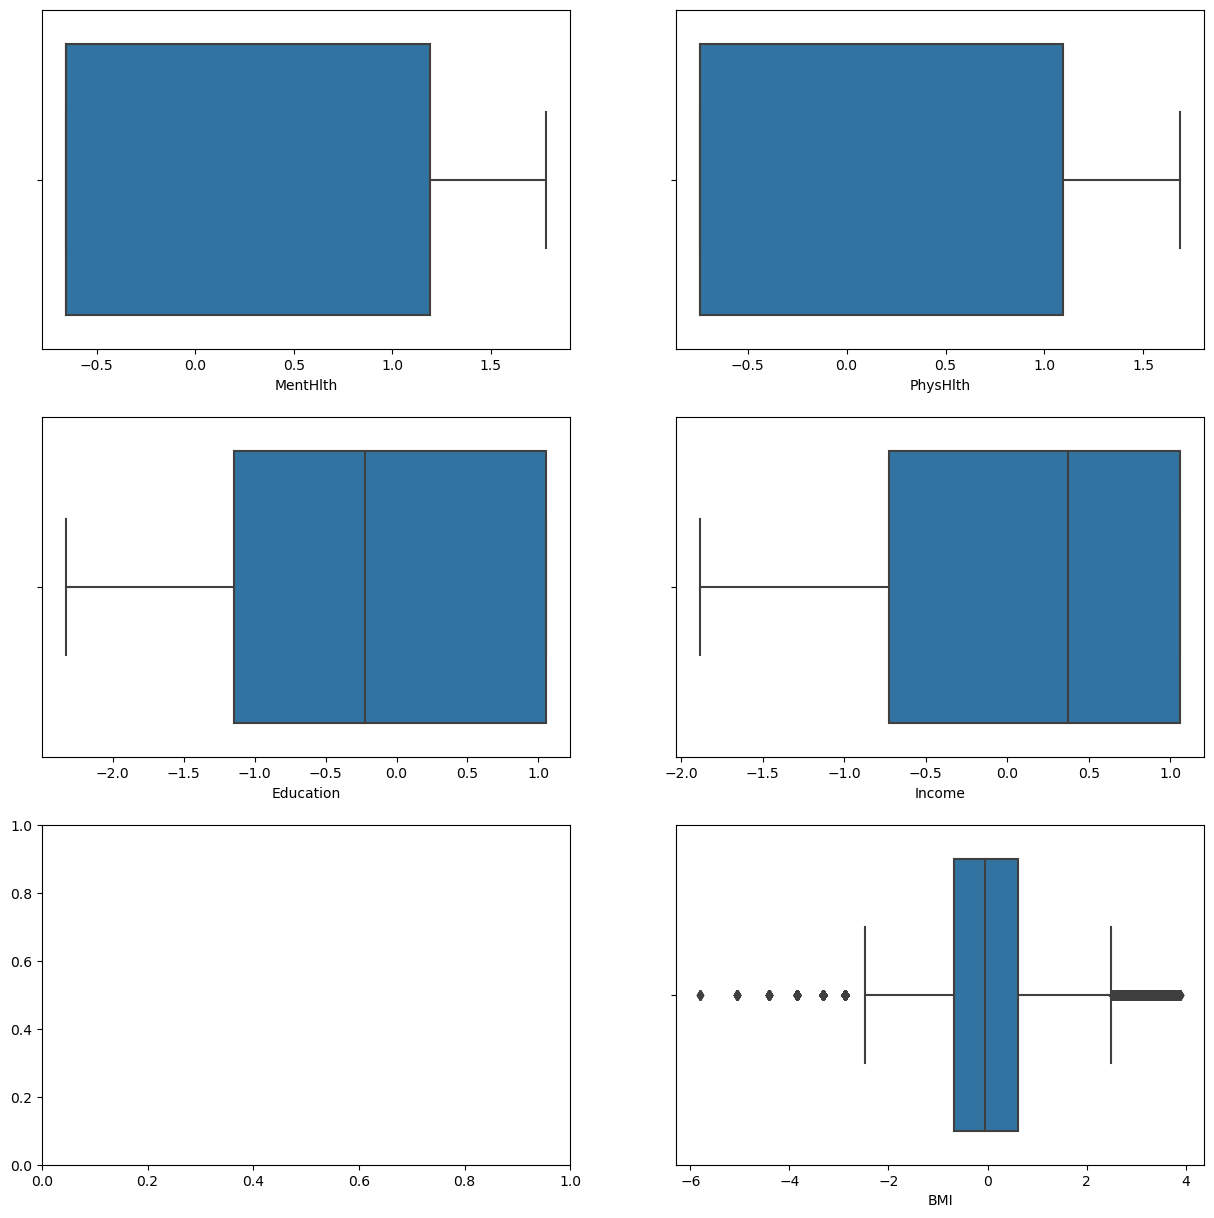

In [74]:
# plot boxplot to examine outliers
fig, ax = plt.subplots(3, 2, figsize=(15,15))
ax = ax.flatten()
for i, v in enumerate(skewed_cols):
    sns.boxplot(x = df_train_transformed[v], ax=ax[i - 1])

plt.show()

## Dealing with class imbalance

<AxesSubplot:xlabel='Status', ylabel='Count'>

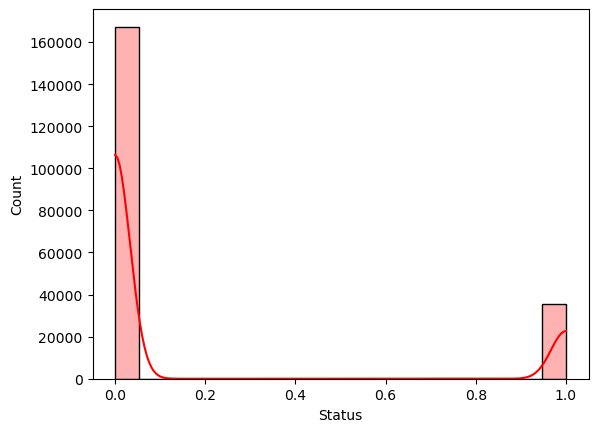

In [75]:
# plot 'Status' columns
sns.histplot(df_train_transformed['Status'], kde=True, color='r', alpha=0.3)

There is a class **imbalance** between 0.0 and 1.0 in **Status** column. Hence, the diabetes prediction might become biased which likely to get better peformance on '0.0' Value. To solve this, I will up-sample the 1.0 cases.

In [76]:
df_train['Status'].value_counts()

0    167313
1     35631
Name: Status, dtype: int64

In [91]:
# Separate majority and minority classes
df_majority = df_train_transformed[df_train_transformed['Status'] == 0]
df_minority = df_train_transformed[df_train_transformed['Status'] == 1]

df_upsampled = df_train_transformed.copy()

# Upsample minority class
df_minority_upsampled = resample(df_minority, 
                                 replace=True,      # sample with replacement
                                 n_samples=len(df_majority),    # to match majority class
                                 random_state=123)  # reproducible results

# Combine majority class with upsampled minority class
df_upsampled = pd.concat([df_majority, df_minority_upsampled])

# Display new class counts
df_upsampled['Status'].value_counts()

0    167313
1    167313
Name: Status, dtype: int64

<AxesSubplot:xlabel='Status', ylabel='Count'>

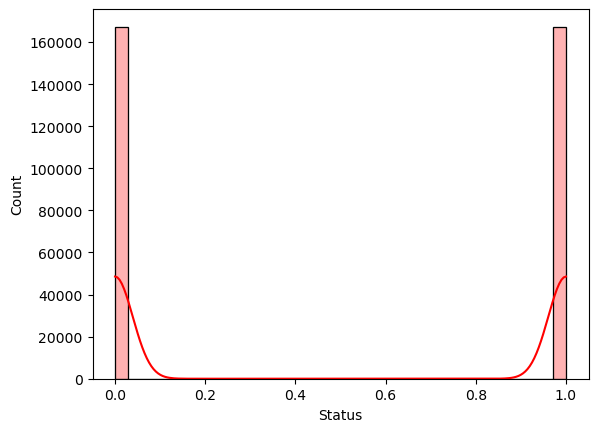

In [92]:
# plot 'Status' columns
sns.histplot(df_upsampled['Status'], kde=True, color='r', alpha=0.3)

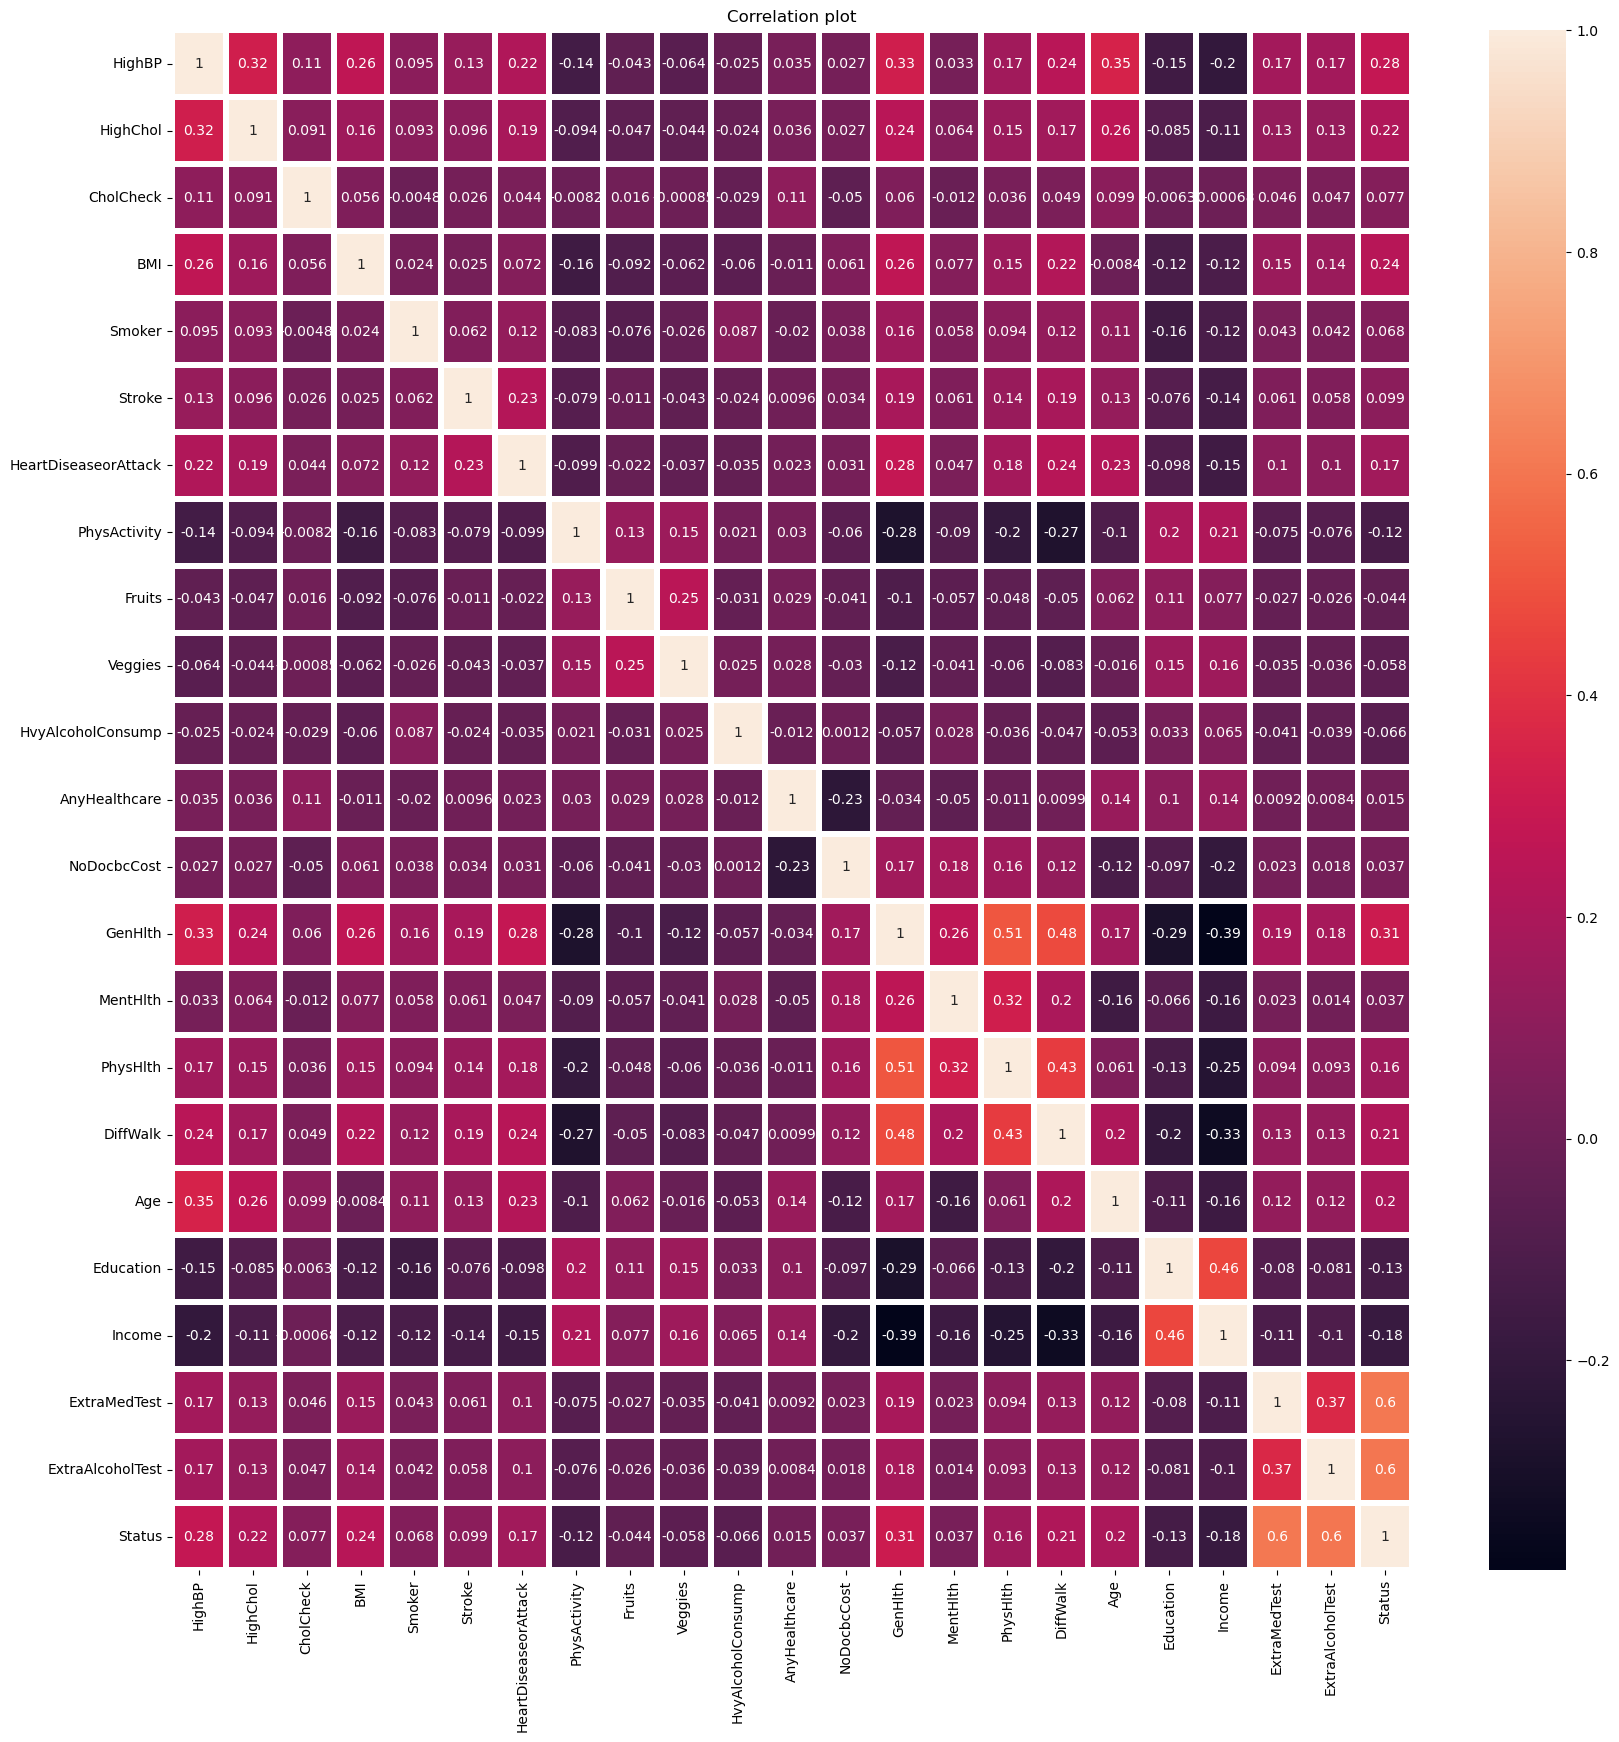

In [94]:
# plot correlation plot to explore correlation between columns
fig, ax = plt.subplots(figsize=(20,20))         
corr_plot = sns.heatmap(df_upsampled.corr(), annot = True,linewidths=3 )
plt.title("Correlation plot")
plt.show()

'CholCheck', 'Smoker' , 'Stroke', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth' have neglectable correlation to the target feature 'Status'. Hence, I will drop these columns.

In [96]:
#select features to drop due to neglectable correlations
selected_features_to_drop =['CholCheck', 'Smoker', 'Stroke', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth']
for feature in selected_features_to_drop:
    if feature in df_upsampled:
        df_upsampled.drop(feature, axis = 1, inplace = True)

# Model Development

Now after pre-process the datasets, we are now able to train the model.

In [98]:
Y = df_upsampled['Status']
X = df_upsampled
X.drop('Status', axis = 1, inplace = True)

## 1. Logisic Regression, No regularization applied

In [156]:
df_X_1 = X.copy()
df_Y_1 = Y.copy()

In [157]:
# split data 20% test, 80% train
train_X_1, test_X_1, train_Y_1, test_Y_1 = train_test_split(
    df_X_1, df_Y_1,
    shuffle=True,
    test_size=0.2
)
print(train_X_1.shape)
print(test_X_1.shape)
print(train_Y_1.shape)
print(test_Y_1.shape)

(267700, 13)
(66926, 13)
(267700,)
(66926,)


In [158]:
# Construct the logistic regression model
logReg = LogisticRegression(
    penalty='none',             # No regularization
    class_weight="balanced",  # Because our training data is imbalanced
    max_iter=1000,
    random_state=99           # Reproducible result)
)
logReg.fit(train_X_1, train_Y_1)

# The intercept and coefficients
print(logReg.intercept_)
print(logReg.coef_)

[-3.18434891]
[[ 4.80257306e-01  3.70961666e-01  3.26344632e-01  2.71907703e-01
  -2.81546144e-04  3.40374881e-01 -9.20095761e-03  1.32389821e-01
   6.60656354e-02 -2.85731976e-02 -8.93471983e-02  2.31640487e-02
   2.29284683e-02]]


In [159]:
# predict the test data
pred_Y_1 = logReg.predict(test_X_1)

In [160]:
print(pred_Y_1)

[1 0 0 ... 0 0 0]


In [163]:
baseline_performance_report = classification_report(test_Y_1, pred_Y_1)
print(baseline_performance_report)

              precision    recall  f1-score   support

           0       0.87      0.88      0.88     33328
           1       0.88      0.87      0.88     33598

    accuracy                           0.88     66926
   macro avg       0.88      0.88      0.88     66926
weighted avg       0.88      0.88      0.88     66926

